#CONTOH KASUS
Aat tinggal dan belajar di eropa. Dia kurang ahli dalam membeli barang elektronik, tetapi dia ingin membeli Laptop seken untuk belajar, sehingga dia bertanya ke teman-teman nya, perangkat apa saja yang harus dimiliki laptop. dan akhirnya setelah banyak masukan Aat menarik kesimpulan spek minimum laptop yang ingin dia beli sebagai berikut:

*   Keluaran    = Asus
*   Ram         = 6 GB
*   OS          = Windows 10
*   Memory Size = 128 GB
*   SSD/HDD/Both= SSD
*   GPU         = AMD
*   CPU         = Intel core i7

Data harga Laptop dapat diambil dari dataset kaggle : 
https://www.kaggle.com/muhammetvarl/laptop-price

#Penyelesaian Kasus
Pada kasus kali ini, jika dilihat dari spek minimum yang diinginkan oleh Aat, kita dapat menggunakan metode Multiple Linear Regression, karena memiliki lebih dari satu variabel bebas.

* Variabel bebas yaitu Keluaran, RAM, OS, Memory Size, SSD/HDD/Both, GPU, dan CPU
* Variabel terikat yaitu harga laptop(euro)

Langkah Pengerjaan Menggunakan Python

Import Library yang akan digunakan :

In [192]:
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.model_selection import train_test_split

Panggil Dataset yang akan digunakan :

In [193]:
df = pd.read_csv("/content/laptop_price.csv", encoding = "ISO-8859-1", engine='python')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


#Data understanding

Penjelasan atribut sebagai berikut :

* Company = Perusahan yang mengeluarkan Laptop
* Product = Model
* TypeName = Type (Notebook, Ultrabook, Gaming, etc.)
* Inches = Ukuran ayar
* ScreenResolution = Resolusi layar
* Cpu = Central Processing Unit (CPU) yang digunakan
* Ram = RAM laptop
* Memory = Hard Disk / SSD Memory
* GPU = Graphics Processing Units (GPU) yang digunakan
* OpSys = Operating System yang digunakan
* Weight = berat laptop
* Price_euros = Harga laptop(euro)

Melihat informasi dari data seperti jumlah data, tipe data, dsb.

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Melihat data kita apakah memiliki missing values atau tidak

In [195]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

#Analisis data eksploratif
Kita tambah fitur untuk lebih mudah membaca data dan memahaminya

In [196]:
df['Ram']=df['Ram'].str.strip('GB').astype(int)
df['Memory_size']=df['Memory'].apply(lambda x: re.sub(r'\.0|GB','',str(x).replace('TB','000')))
df['Memory_size']=df['Memory_size'].apply(lambda x: sum(int(re.search(r'\d+',s).group()) for s in x.split('+')))
df['Weight']=df['Weight'].str.strip('kg').astype(float)
df['Memory']=df['Memory'].astype(str)
df['SSD or Not or Both']=df.Memory.apply(lambda x: 'both' if 'SSD' in x and 'HDD' in x else 'Yes' if 'SSD' in x else 'No')
df['Gpu_company'] = df.Gpu.apply(lambda x: x.split(' ')[0])
df['Cpu_company']=df['Cpu'].str.split(' ', 1, expand=True)[0]
df['Cpu_type']=df['Cpu'].str.split(' ', 1, expand=True)[1].apply(lambda x: x.split(' ')[1] if x.split(' ')[0]=='Core' else x.split(' ')[0])
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Memory_size,SSD or Not or Both,Gpu_company,Cpu_company,Cpu_type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,Yes,Intel,Intel,i5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,128,No,Intel,Intel,i5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,256,Yes,Intel,Intel,i5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512,Yes,AMD,Intel,i7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,Yes,Intel,Intel,i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,128,Yes,Intel,Intel,i7
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,512,Yes,Intel,Intel,i7
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,64,No,Intel,Intel,Celeron
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,1000,No,AMD,Intel,i7


Buang data yang sekiranya tidak kita gunakan

In [197]:
df.drop(['Cpu','Weight','laptop_ID','Product','Inches','ScreenResolution','Memory','Gpu','TypeName'],inplace=True,axis=1)
df

,Company,Ram,OpSys,Price_euros,Memory_size,SSD or Not or Both,Gpu_company,Cpu_company,Cpu_type
0,Apple,8,macOS,1339.69,128,Yes,Intel,Intel,i5
1,Apple,8,macOS,898.94,128,No,Intel,Intel,i5
2,HP,8,No OS,575.00,256,Yes,Intel,Intel,i5
3,Apple,16,macOS,2537.45,512,Yes,AMD,Intel,i7
4,Apple,8,macOS,1803.60,256,Yes,Intel,Intel,i5
...,...,...,...,...,...,...,...,...,...
1298,Lenovo,4,Windows 10,638.00,128,Yes,Intel,Intel,i7
1299,Lenovo,16,Windows 10,1499.00,512,Yes,Intel,Intel,i7
1300,Lenovo,2,Windows 10,229.00,64,No,Intel,Intel,Celeron
1301,HP,6,Windows 10,764.00,1000,No,AMD,Intel,i7


Untuk mempermudah proses linier regression, maka kita perlu mengubah tipe data yang object menjadi int

In [198]:
le={}
for col in set(df.columns).difference({'Price_euros','Memory_size','Ram'}):
    le[col] = LabelEncoder()
    df[col]  = le[col].fit_transform(df[col])
df

,Company,Ram,OpSys,Price_euros,Memory_size,SSD or Not or Both,Gpu_company,Cpu_company,Cpu_type
0,1,8,8,1339.69,128,1,2,1,16
1,1,8,8,898.94,128,0,2,1,16
2,7,8,4,575.00,256,1,2,1,16
3,1,16,8,2537.45,512,1,0,1,17
4,1,8,8,1803.60,256,1,2,1,16
...,...,...,...,...,...,...,...,...,...
1298,10,4,5,638.00,128,1,2,1,17
1299,10,16,5,1499.00,512,1,2,1,17
1300,10,2,5,229.00,64,0,2,1,7
1301,7,6,5,764.00,1000,0,0,1,17


Dapat dilihat data sudah berubah :

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   int64  
 1   Ram                 1303 non-null   int64  
 2   OpSys               1303 non-null   int64  
 3   Price_euros         1303 non-null   float64
 4   Memory_size         1303 non-null   int64  
 5   SSD or Not or Both  1303 non-null   int64  
 6   Gpu_company         1303 non-null   int64  
 7   Cpu_company         1303 non-null   int64  
 8   Cpu_type            1303 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 91.7 KB


#Analisis Univariat
Melihat distribusi dari Price_euros

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


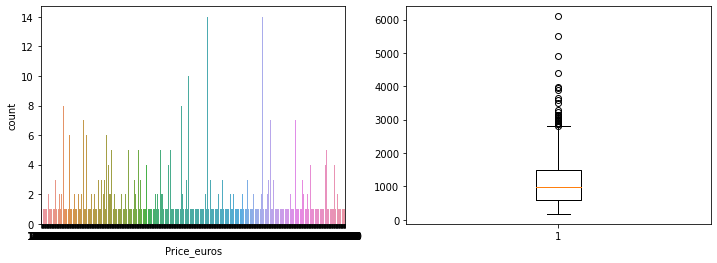

In [200]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df["Price_euros"])

f.add_subplot(1,2,2)
plt.boxplot(df["Price_euros"])
plt.show()

Harga laptop dari data price_euros yang ada berkisar dari 0-2500 an

Banyak terdapat data outliers (Data yang menyimpang terlalu jauh)

Karena, data price_euros yang seharusnya menjadi harga acuan kita memiliki banyak data yang menyimpang. Maka, kita hapus data yang terdapat di outliers supaya data yang digunakan tidak memiliki penyimpangan yang berlebihan

In [201]:
df=df.drop(df[df.Price_euros>2500].index)

Setelah itu kita lihat kembali distribusi dari price_euros, dapat dilihat tidak ada data pada outliers. Yang artinya tidak ada data yang menyimpang terlalu jauh

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


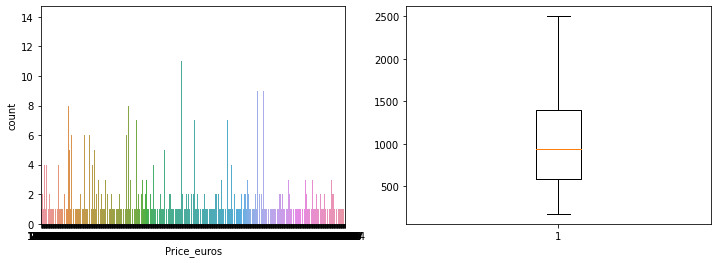

In [202]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df["Price_euros"])

f.add_subplot(1,2,2)
plt.boxplot(df["Price_euros"])
plt.show()

#Analisis bivariat

Melihat hubungan antara variabel x dan variabel y

<Figure size 720x576 with 0 Axes>

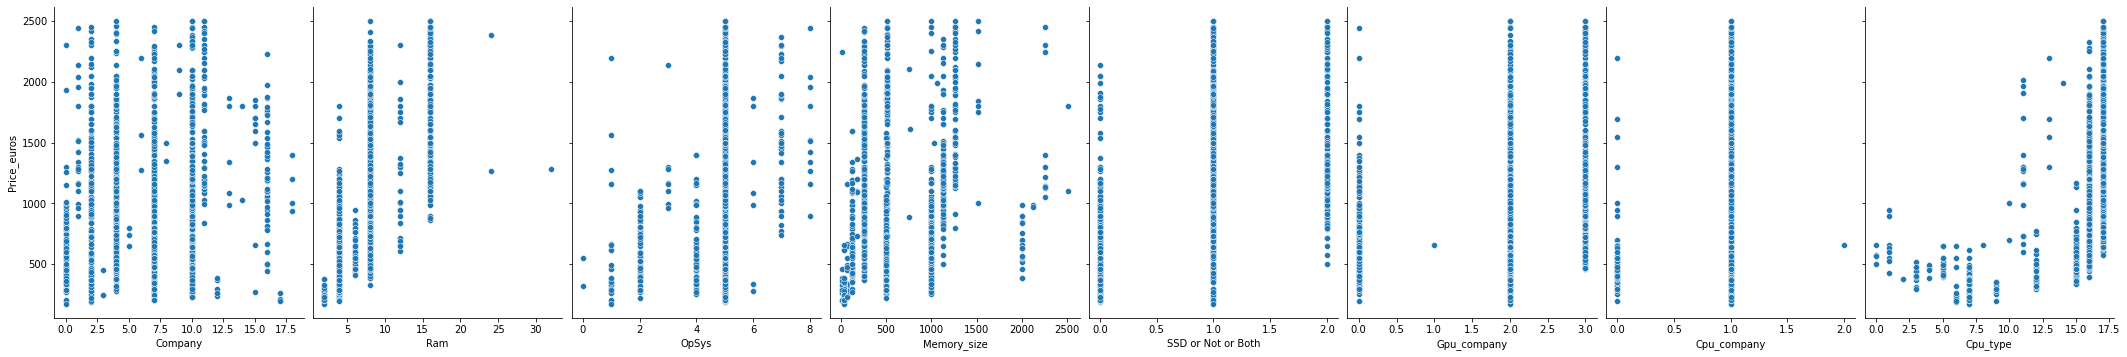

In [203]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=["Company","Ram","OpSys","Memory_size","SSD or Not or Both","Gpu_company","Cpu_company","Cpu_type"], y_vars=["Price_euros"], height=5, aspect=0.75)
plt.show()

Mengetahui nilai korelasi dari variabel x dan variabel y

In [204]:
df.corr().style.background_gradient().set_precision(2)

,Company,Ram,OpSys,Price_euros,Memory_size,SSD or Not or Both,Gpu_company,Cpu_company,Cpu_type
Company,1.00,0.06,0.14,0.15,-0.09,0.10,0.06,0.04,0.07
Ram,0.06,1.00,0.14,0.69,0.33,0.52,0.25,0.10,0.42
OpSys,0.14,0.14,1.00,0.30,0.00,0.20,0.06,-0.06,0.20
Price_euros,0.15,0.69,0.30,1.00,0.09,0.55,0.30,0.19,0.53
Memory_size,-0.09,0.33,0.00,0.09,1.00,0.14,0.06,-0.07,0.16
SSD or Not or Both,0.10,0.52,0.20,0.55,0.14,1.00,0.22,0.07,0.35
Gpu_company,0.06,0.25,0.06,0.30,0.06,0.22,1.00,0.49,0.37
Cpu_company,0.04,0.10,-0.06,0.19,-0.07,0.07,0.49,1.00,0.61
Cpu_type,0.07,0.42,0.20,0.53,0.16,0.35,0.37,0.61,1.00


Dari tabel korelasi di atas; 
* Dapat dilihat bahwa Ram mempunyai hubungan linear positif yang sangat kuat dengan price_euros. Sedangkan,
* Memory_size memiliki nilai kolerasi mendekati nol yang menandakan bahwa ukuran memori tidak terlalu berpengaruh pada harga

#Modelling

In [205]:
df.head()

,Company,Ram,OpSys,Price_euros,Memory_size,SSD or Not or Both,Gpu_company,Cpu_company,Cpu_type
0,1,8,8,1339.69,128,1,2,1,16
1,1,8,8,898.94,128,0,2,1,16
2,7,8,4,575.00,256,1,2,1,16
4,1,8,8,1803.60,256,1,2,1,16
5,0,4,5,400.00,500,0,0,0,5


1. buat variabel x dan y

In [206]:
x = df.drop(columns="Price_euros")
y = df["Price_euros"]

2. Bagi dataset menjadi 80% training & 20% testing (angka random yang digunakan adalah 5)

In [207]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

Check shape dari data training dan testing

In [208]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(998, 8)
(998,)
(250, 8)
(250,)


3. Buat objek linear regresi

In [209]:
lin_reg = LinearRegression()

 4. Train model menggunakan data training yang sudah dibagi

In [210]:
lin_reg.fit(x_train, y_train)

LinearRegression()

5. Cari tau nilai koefisien (m) dan intercept (b)

In [211]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 7.78923640e+00  6.89550815e+01  6.68864928e+01 -1.76918482e-01
  1.43114424e+02  4.26296824e+01 -1.77492650e+02  3.85363219e+01]
-374.97650260722


Buat ke dalam DataFrame

In [212]:
coef_dict = {
    "features": x.columns,
    "coef_value": lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=["features", "coef_value"])
coef

,features,coef_value
0,Company,7.789236
1,Ram,68.955081
2,OpSys,66.886493
3,Memory_size,-0.176918
4,SSD or Not or Both,143.114424
5,Gpu_company,42.629682
6,Cpu_company,-177.492650
7,Cpu_type,38.536322


Dari nilai m dan b di atas, jika dimasukkan ke dalam rumus akan menjadi :

y = 7.789236 + 68.955081 + 66.886493 - 0.176918 + 143.114424 + 42.629682 - 177.492650 + 38.536322

In [213]:
y_pred = lin_reg.predict(x_test)

6. Cari tau akurasi dari model yang telah kita buat menggunakan data testing

In [214]:
lin_reg.score(x_test, y_test)

0.6407229852830805

Akurasi dari model yang telah kita buat yaitu 64.07%

# Prediksi

Prediksi harga laptop yang sesuai dengan spek minimum Aat :
*   Keluaran    = Asus
*   Ram         = 6 GB
*   OS          = Windows 10
*   Memory Size = 128 GB
*   SSD/HDD/Both= SSD
*   GPU         = AMD
*   CPU         = Intel core i7


In [215]:
lin_reg.predict([[2,6, 5, 128, 1,0,1,17]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([986.85860374])

Prediksi harga laptop yang sesuai dengan spek Aat adalah 986.85 euro